**By:** Nicolai Haug

In [1]:
# Jupyter Notebook configuration

import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from plotnine import *

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# Helper functions
class Caption:
    def __init__(self, s):
        self.s = s
        
    def _repr_html_(self):
        return f"{self.s}"
    
    def _repr_latex_(self):
        return '\\begin{center}\n'+self.s+'\n\\end{center}'
    
    
def fig_number_generator(n):
    for i in range(1, n):
        yield i
        
fig_num = fig_number_generator(10)

# Dataset

## Introduction

In this assignment, we consider the `penguins` dataset made available in [1]. The dataset is a simplified version of the raw data originally published in [2]. The data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. 

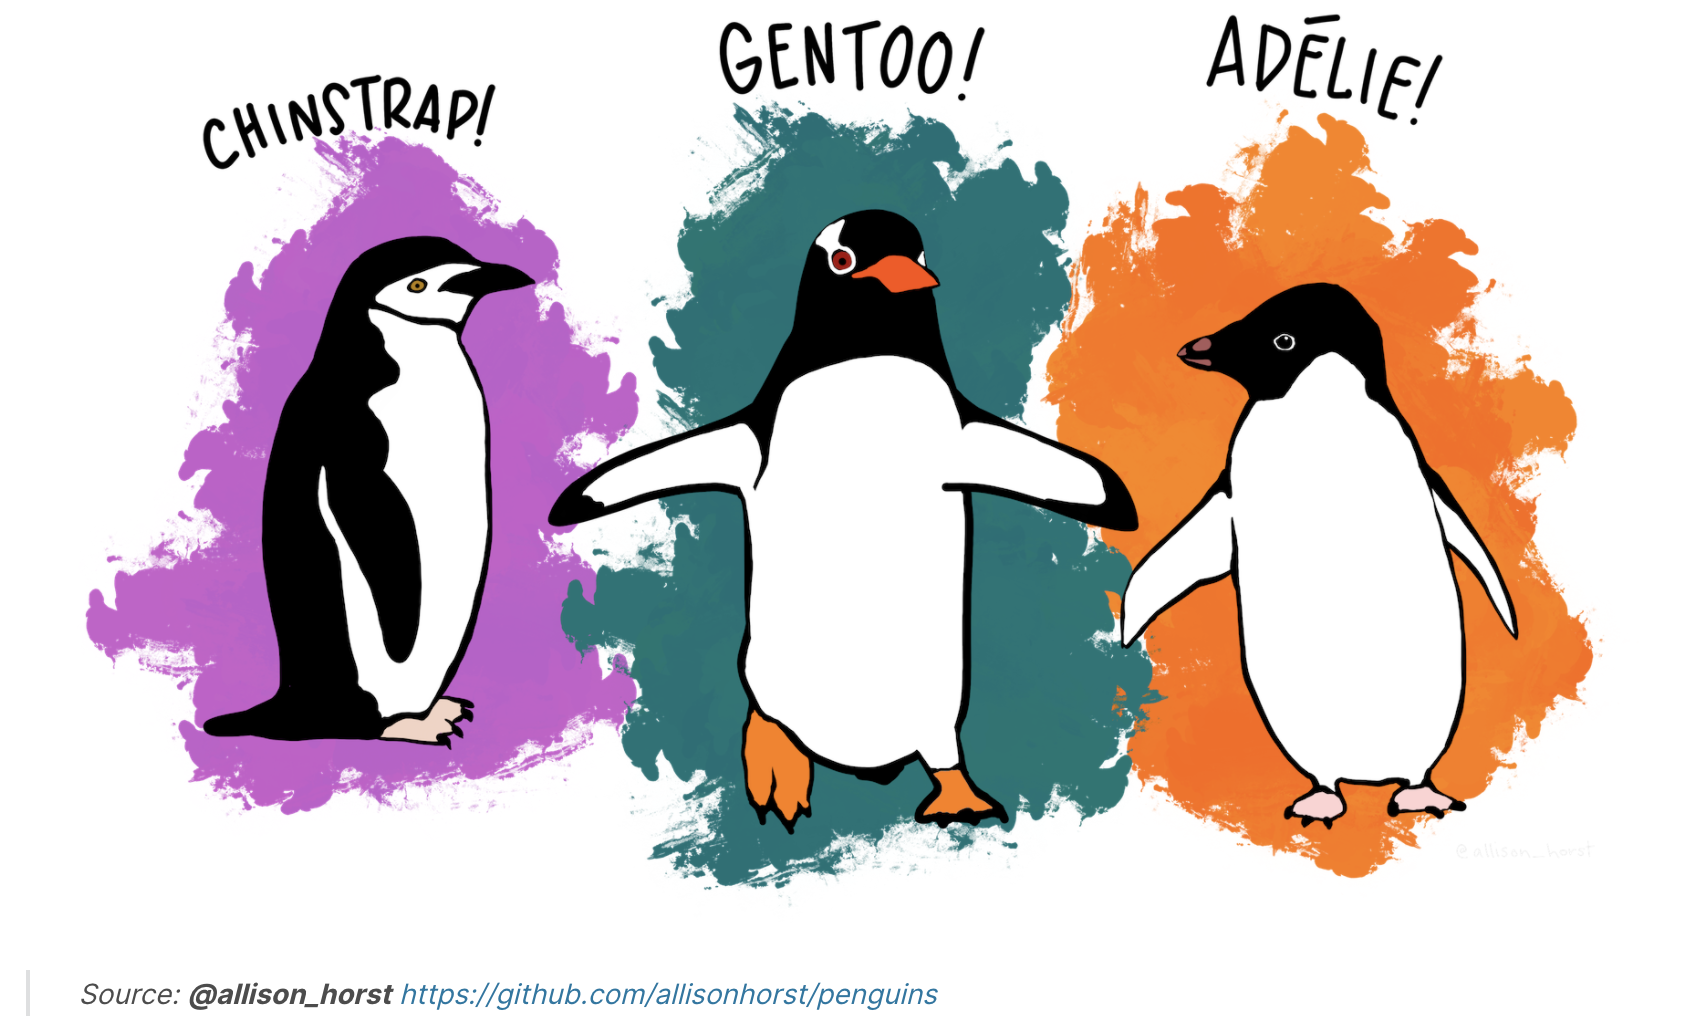

In [2]:
caption = (f"Figure {next(fig_num)}: " +
           "Meet the penguins! " +
           "Retrieved from [1].")
display(Image(filename="penguins.png", width=500, height=300),
        Caption(caption)
       )

In [3]:
# Load dataset
penguins = pd.read_csv("penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The dataset consists of 344 samples and 7 columns:

* `species`: penguin species (Adélie, Chinstrap or Gentoo)
* `bill_length_mm`: bill length (millimeters)
* `bill_depth_mm`: bill depth (millimeters)
* `flipper_length_mm`: flipper length (millimeters)
* `body_mass_g`: body mass (grams)
* `island`: island name (Biscoe, Dream or Torgersen) in the Palmer Archipelago (Antarctica)
* `sex`: penguin sex (female, male)

Of the 7 columns, 3 are categorical (`species`, `island`, `sex`) and the rest are numeric. 

### What are flippers?

Penguins wings are called flippers.


### What are bill length and depth?

The upper ridge of a bird's beak (or bill) is referred to as the culmen. The raw data contains measurements of culmen lengths and depths. In the simplified `penguin` dataset, culmen length and depth measurements have been named as bill length and depth. The bill/culmen lengths and depths were measured as shown below. 

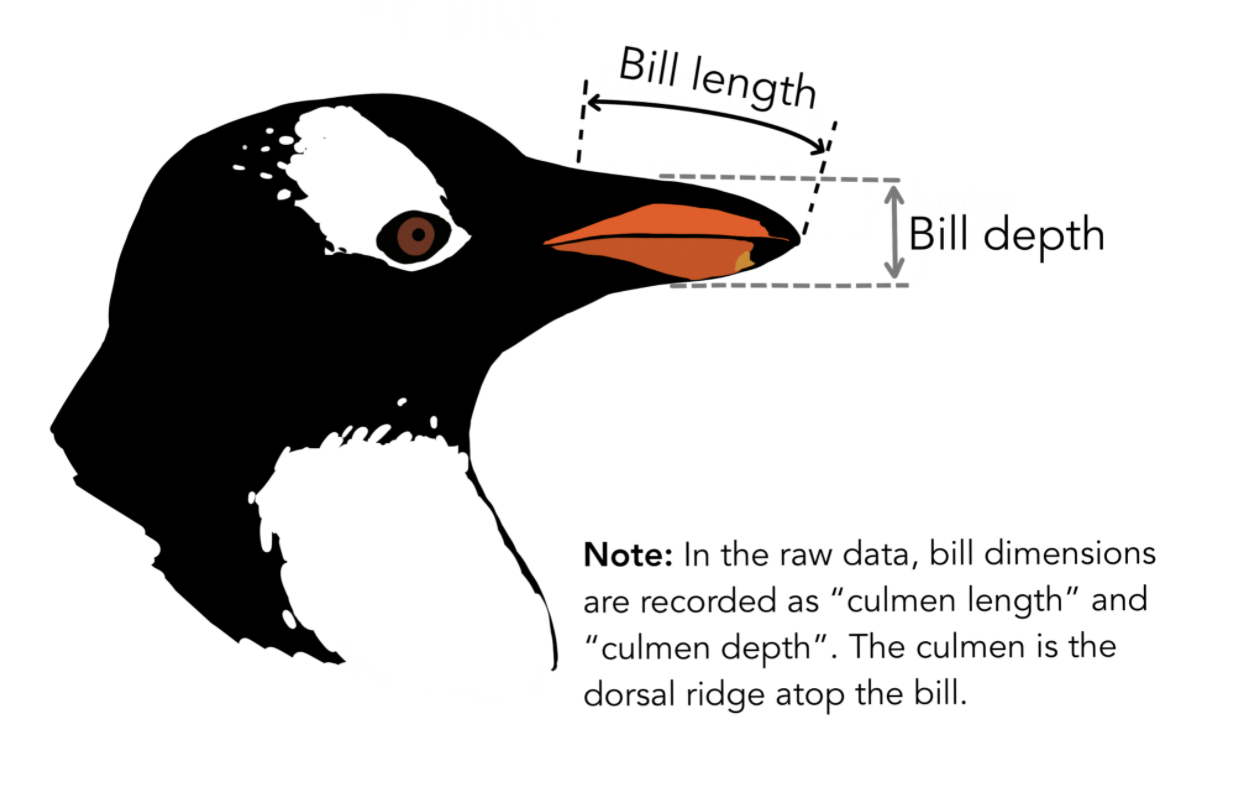

In [4]:
caption = (f"Figure {next(fig_num)}: " +
           "Measuring bill dimensions. " +
           "Retrieved from [1].")
display(Image(filename="bill.png", width=500, height=300),
        Caption(caption)
       )

## Conversion of Units and Renaming Columns

In order to make our analyses clearer, we choose to convert the units to more economical ones: 

In [5]:
# convert mm -> cm
penguins.loc[:, "bill_length_mm"] = penguins["bill_length_mm"].div(10)
penguins.loc[:, "bill_depth_mm"] = penguins["bill_depth_mm"].div(10)
penguins.loc[:, "flipper_length_mm"] = penguins["flipper_length_mm"].div(10)
# convert g -> kg
penguins.loc[:, "body_mass_g"] = penguins["body_mass_g"].div(1000)

Since we converted the units, we need to rename the column names to reflect the units being used. Furthermore, we will be using plotting functions that extract axes labels from the column names. Therefore, we opt to rename the column names to ones that are easier readable to the human eye. 

In [6]:
penguins.rename(columns={"species": "Species",
                         "island": "Island",
                         "bill_length_mm": "Bill length (cm)",
                         "bill_depth_mm": "Bill depth (cm)",
                         "flipper_length_mm": "Flipper length (cm)",
                         "body_mass_g": "Body mass (kg)",
                         "sex": "Sex"
                  },
         inplace=True
         )

In [7]:
penguins

,Species,Island,Bill length (cm),Bill depth (cm),Flipper length (cm),Body mass (kg),Sex
0,Adelie,Torgersen,3.91,1.87,18.1,3.75,MALE
1,Adelie,Torgersen,3.95,1.74,18.6,3.80,FEMALE
2,Adelie,Torgersen,4.03,1.80,19.5,3.25,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,3.67,1.93,19.3,3.45,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,4.68,1.43,21.5,4.85,FEMALE
341,Gentoo,Biscoe,5.04,1.57,22.2,5.75,MALE
342,Gentoo,Biscoe,4.52,1.48,21.2,5.20,FEMALE


## Data Cleaning

Real-life datasets are almost never complete records, which means that there are missing or corrupt data. In the `penguins` dataset there are missing data that needs to be handled before we start our analyses. 

We start by finding the number of missing values (NaN values) in every column: 

In [8]:
penguins.isna().sum().to_frame("NaN count")

,NaN count
Species,0
Island,0
Bill length (cm),2
Bill depth (cm),2
Flipper length (cm),2
Body mass (kg),2
Sex,11


As we can see, there are few missing values present. To rid the dataset of these values, we can just remove the corresponding rows:

In [9]:
print(f"Number of samples in original dataset: {penguins.shape[0]}")

# Remove missing values 
penguins = penguins.dropna()
print(f"Number of samples after removal of missing values: {penguins.shape[0]}")

Number of samples in original dataset: 344
Number of samples after removal of missing values: 333


In [10]:
# Verify that there are no missing values left in dataset
penguins.isna().sum().to_frame("NaN count")

,NaN count
Species,0
Island,0
Bill length (cm),0
Bill depth (cm),0
Flipper length (cm),0
Body mass (kg),0
Sex,0


## Balance of Dataset 

As many machine learning algorithms assumes an equal number of samples for each class, imbalanced datasets pose a challenge for classification predictive modelling. Technically, any dataset with an unequal distribution of classes is imbalanced. Though, an imbalanced dataset is usually defined as a dataset where the majority class (the class that has many samples) is much larger than the minority class (the class that has few samples). 

An important step of the data preprocessing is therefore to assess the balance of the dataset, so that possible enhancements can be made to ensure optimal performance. 

We can assess the distribution of the penguin classes by either plotting the counts of samples in each class or the proportion of each class contained in the dataset:

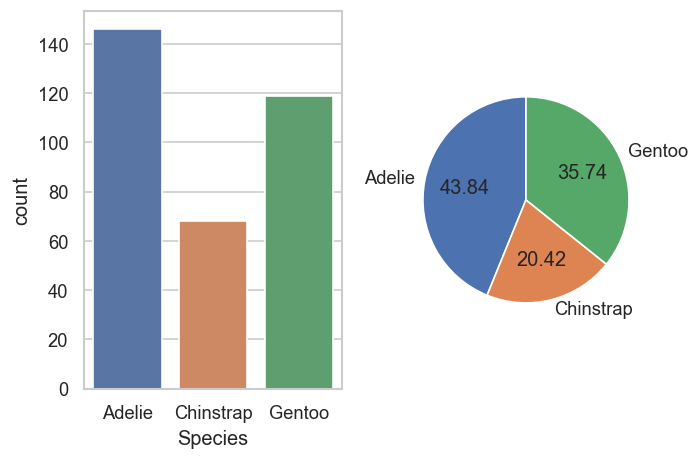

In [11]:
fig, axes = plt.subplots(nrows=1, 
                         ncols=2, 
                         figsize=(6, 4), 
                         dpi=120,
                         tight_layout=True
                        )

# Histogram with count of number of samples in each class
sns.countplot(data=penguins, 
              x="Species", 
              ax=axes[0]
             )

# Pie chart with proportion of each class contained in dataset
penguins.groupby("Species").size().plot(kind="pie", 
                                        ylabel="",
                                        labels=["Adelie", 
                                                "Chinstrap", 
                                                "Gentoo"
                                               ],
                                        autopct="%.2f",
                                        startangle=90,
                                        ax=axes[1]
                                       )

plt.close()

caption = (f"Figure {next(fig_num)}: " +
           "Distribution of samples across the penguin classes.")
display(fig, Caption(caption))

We do have an imbalanced dataset, in particular, the number of samples from the chinstrap penguin class is roughly half of the majority class. In the case of imbalanced data we can either up-sample the minority class or down-sample the majority class. However, since modelling is not part of this assignment, we will not balance the dataset.  

# Problem 1: Table

A table summarizing the dataset can be found below:

In [12]:
penguins.groupby(["Species", "Sex", "Island"]).agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)

Bill length (cm)                                 \
                                      count  mean median   std   min   max   
Species   Sex    Island                                                      
Adelie    FEMALE Biscoe                  22  3.74   3.78  0.18  3.45  4.05   
                 Dream                   27  3.69   3.68  0.21  3.21  4.22   
                 Torgersen               24  3.76   3.76  0.22  3.35  4.11   
          MALE   Biscoe                  22  4.06   4.08  0.20  3.76  4.56   
                 Dream                   28  4.01   4.03  0.17  3.63  4.41   
                 Torgersen               23  4.06   4.11  0.30  3.46  4.60   
Chinstrap FEMALE Dream                   34  4.66   4.63  0.31  4.09  5.80   
          MALE   Dream                   34  5.11   5.10  0.16  4.85  5.58   
Gentoo    FEMALE Biscoe                  58  4.56   4.55  0.21  4.09  5.05   
          MALE   Biscoe                  61  4.95   4.95  0.27  4.44  5.96   

                           Bill depth (cm)                                 \
                                     count  mean median   std   min   max   
Species   Sex    Island                                                     
Adelie    FEMALE Biscoe                 22  1.77   1.77  0.11  1.60  2.07   
                 Dream                  27  1.76   1.78  0.09  1.55  1.93   
                 Torgersen              24  1.76   1.74  0.09  1.59  1.93   
          MALE   Biscoe                 22  1.90   1.89  0.09  1.72  2.11   
                 Dream                  28  1.88   1.86  0.10  1.70  2.12   
                 Torgersen              23  1.94   1.92  0.11  1.76  2.15   
Chinstrap FEMALE Dream                  34  1.76   1.76  0.08  1.64  1.94   
          MALE   Dream                  34  1.93   1.93  0.08  1.75  2.08   
Gentoo    FEMALE Biscoe                 58  1.42   1.42  0.05  1.31  1.55   
          MALE   Biscoe                 61  1.57   1.57  0.07  1.41  1.73   

                           Flipper length (cm)                            \
                                         count   mean median   std   min   
Species   Sex    Island                                                    
Adelie    FEMALE Biscoe                     22  18.72  18.70  0.67  17.2   
                 Dream                      27  18.79  18.80  0.55  17.8   
                 Torgersen                  24  18.83  18.90  0.46  17.6   
          MALE   Biscoe                     22  19.04  19.10  0.65  18.0   
                 Dream                      28  19.19  19.05  0.68  17.8   
                 Torgersen                  23  19.49  19.50  0.59  18.1   
Chinstrap FEMALE Dream                      34  19.17  19.20  0.58  17.8   
          MALE   Dream                      34  19.99  20.05  0.60  18.7   
Gentoo    FEMALE Biscoe                     58  21.27  21.20  0.39  20.3   
          MALE   Biscoe                     61  22.15  22.10  0.57  20.8   

                                 Body mass (kg)                                 
                             max          count  mean median   std   min   max  
Species   Sex    Island                                                         
Adelie    FEMALE Biscoe     19.9             22  3.37   3.38  0.34  2.85  3.90  
                 Dream      20.2             27  3.34   3.40  0.21  2.90  3.70  
                 Torgersen  19.6             24  3.40   3.40  0.26  2.90  3.80  
          MALE   Biscoe     20.3             22  4.05   4.00  0.36  3.55  4.78  
                 Dream      20.8             28  4.05   3.99  0.33  3.42  4.65  
                 Torgersen  21.0             23  4.03   4.00  0.37  3.32  4.70  
Chinstrap FEMALE Dream      20.2             34  3.53   3.55  0.29  2.70  4.15  
          MALE   Dream      21.2             34  3.94   3.95  0.36  3.25  4.80  
Gentoo    FEMALE Biscoe     22.2             58  4.68   4.70  0.28  3.95  5.20  
          MALE   Biscoe     23.1             61  

# Problem 2: Bad Figures

The inspiration to many of the following figures and discussions on their pros and cons are based on [3].

## Distribution of Penguins Across Islands

With the following figure, we want to visualize how the penguin species are distributed across the islands.

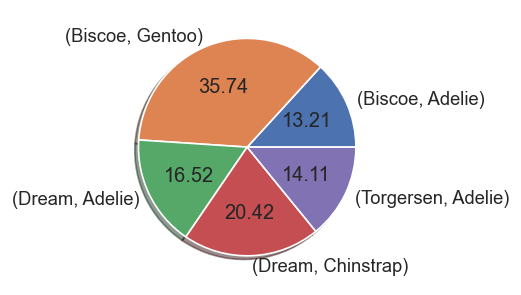

In [13]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=120)
penguins.groupby(['Island', 'Species']).size().plot(kind='pie', 
                                                    ylabel='', 
                                                    autopct='%.2f',
                                                    shadow=True,
                                                    ax=ax
                                                   )

plt.close()
caption = (f"Figure {next(fig_num)}: " +
           "Distirbution of penguin species across islands in the Palmer Archipelago.")
display(fig, Caption(caption))

Using pie charts for visualizing proportions is not necessarily a bad idea, but in this case, where we try to visualize two categories at once, it becomes cluttered. Also, the shadow just adds to the clutter. The result is a representation which makes it difficult to immediately see how the different penguin species are distributed across the islands. 

## Body Mass Across Species and Gender

With the next figure, we want a representation that informs us on the body masses across penguin species and gender. We choose a representation where we mark the average body mass of both male and female penguins for all species.

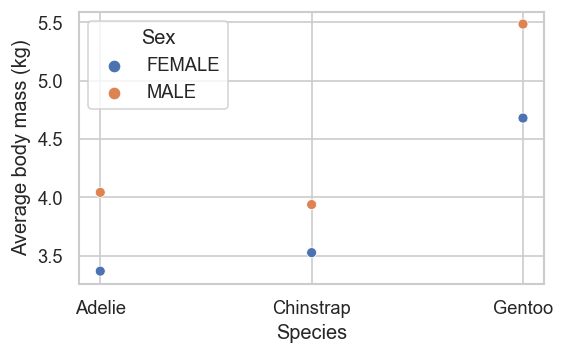

In [14]:
# Compute mean body masses
body_mass_df = penguins.groupby(["Species", "Sex"])["Body mass (kg)"].mean().to_frame()

# Plot mean body masses 
fig, ax = plt.subplots(figsize=(5, 3), dpi=120)
sns.scatterplot(data=body_mass_df, 
                x="Species", 
                y="Body mass (kg)", 
                hue="Sex",
                ax=ax
               )
ax.set(ylabel="Average body mass (kg)")

plt.close()
caption = (f"Figure {next(fig_num)}: " +
           "Average body mass across penguin species and gender.")
display(fig, Caption(caption))

The information we obtain from the above figure, namely the average body mass for each gender in the different penguin species, is the same we can find in the table. The figure is more effective than the table to present how the average body masses compare across species and gender, but it is a simplistic representation of the data. An improvement would be to use all the available data to present the distribution of body masses, in order to also give us a sense of the variability.

## Relationships Between Variables

Scatter plots shows the relationships between variables measured for the same individuals. With the following figure, we make a 3-dimensional scatter plot to assess the relationships between 3 variables. 

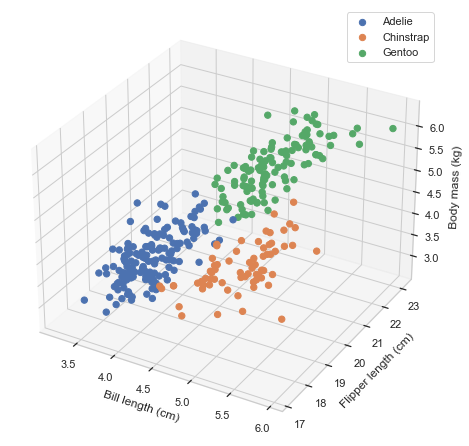

In [15]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

for species in penguins["Species"].unique():
    penguins_group = penguins.loc[penguins["Species"] == species]
    x = penguins_group["Bill length (cm)"]
    y = penguins_group["Flipper length (cm)"]
    z = penguins_group["Body mass (kg)"]
    ax.scatter(x, y, z, s=40, marker='o', alpha=1, label=species)

ax.set(xlabel="Bill length (cm)",
       ylabel="Flipper length (cm)",
       zlabel="Body mass (kg)"
      )
       
plt.legend()

plt.close()
caption = (f"Figure {next(fig_num)}: " +
           "Body mass versus bill and flipper length for the three " +
           "penguin species. Each dot represents a penguin and dot " +
           "color the species of the penguin.")
display(fig, Caption(caption))

"Don't go 3D" is an advice given in [3]. The reason becomes quite obvious when we try to assess the relationships between the variables in the above figure. It is difficult, if not impossible, to see exactly where the data points are located in space. Thus, the figure fails to provide any meaningful insight about the relationships between the variables. 

# Problem 3: Good Figures

## Distribution of Penguins Across Islands

In the following figure, we use a count plot, which can be thought of as a histogram across categorical variables, to improve the representation in Figure 4.

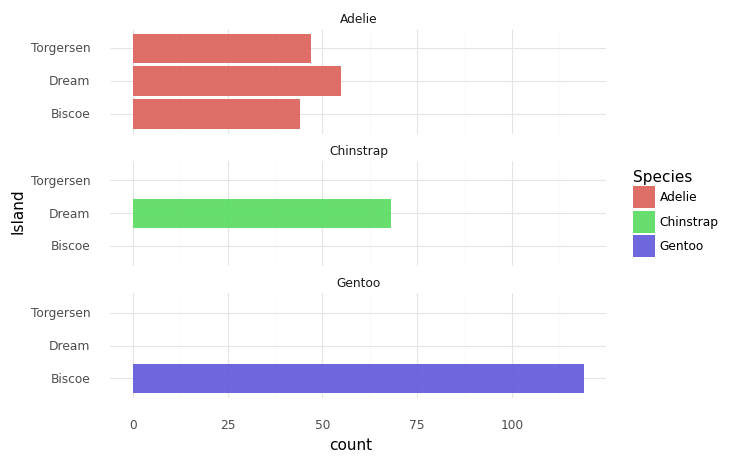

<ggplot: (8791581535757)>

In [16]:
p = (ggplot(penguins, aes(x='Island', fill='Species')) +
       geom_bar(alpha=0.9) +
       theme_minimal() +
       facet_wrap('Species', ncol=1) +
       coord_flip()
      )

caption = (f"Figure {next(fig_num)}: " +
           "Distirbution of penguin species across islands in the Palmer Archipelago.")
display(p, Caption(caption))

Figure 7 has a much clearer representation of the distribution of penguin species across the islands than Figure 4. We just need a glance of the Figure 7 to digest the information the figure wants to convey.   

## Body Mass Across Species and Gender

In the following figure, we use violin plots to improve the representation in Figure 5.

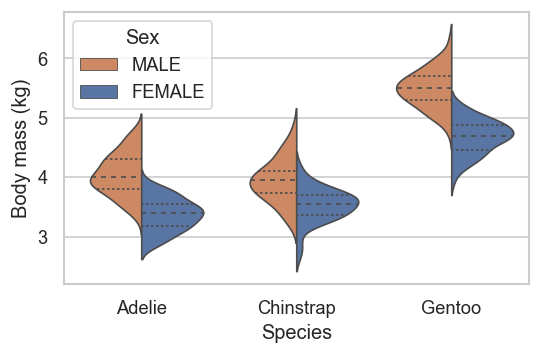

In [17]:
fig, ax = plt.subplots(figsize=(5, 3), 
                       dpi=120
                      )
sns.violinplot(data=penguins, 
               x="Species", 
               y="Body mass (kg)", 
               hue="Sex",
               ax=ax,
               split=True, 
               inner="quartiles", 
               linewidth=1,
               palette={"MALE": "C1", 
                        "FEMALE": "C0"}
              )

plt.close()
caption = (f"Figure {next(fig_num)}: " +
           "Probability density estimates of body masses across " +
           "penguin species and gender. The dashed lines indicate " +
           "the first, second and third quartile positions.")
display(fig, Caption(caption))

Figure 8 improves on Figure 5 by utilizing all the body mass data in its presentation. It shows a kernel density estimate of the data and indicates the median, or second quartile (the middle dashed line), of the distribution. As the violin plot shows the full distributions of the data, it is more nuanced picture of the data than Figure 5 that just plots point estimates. We see that the overall shape and distribution of the body masses are similar for both genders and across species, and that males tend to have a larger body mass than females. Adélie and Chinstrap penguins are quite similar in terms of body mass, and most of Gentoo penguins are larger than the two. 

## Relationships Between Variables

Finally, we improve on Figure 6 by instead making a pair plot.

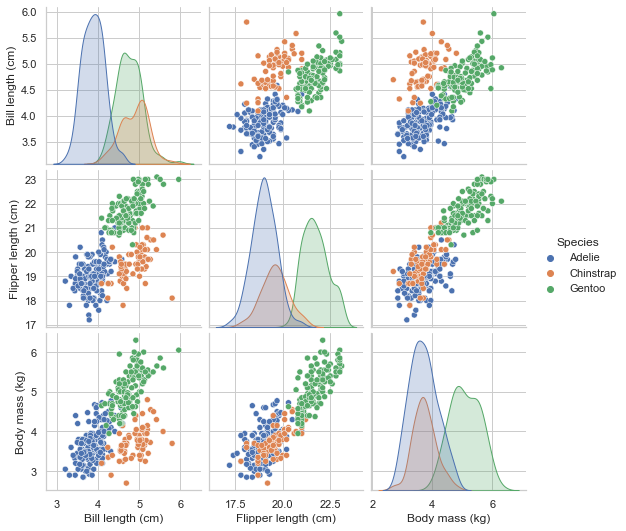

In [18]:
sns.pairplot(data=penguins, 
             x_vars=["Bill length (cm)", "Flipper length (cm)", "Body mass (kg)"],
             y_vars=["Bill length (cm)", "Flipper length (cm)", "Body mass (kg)"],
             hue="Species",
            )

plt.show()
caption = (f"Figure {next(fig_num)}: " +
           "Pair plot showing multiple relationships between " + 
           "variables. The diagonal panels show the univariate " +
           "distributions for each group.")
display(Caption(caption))

Figure 9 greatly improves on Figure 6 by allowing us to see the positions of the data points in space. We can easily see clusters that are separable:

* Bill length vs. flipper length
* Bill length vs. body mass

Furthermore, the distributions on the diagonal makes it easy to see the difference among species in terms of means, variability and shape. 

# References 

[1] Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi:10.5281/zenodo.3960218.

[2] Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

[3] Claus O. Wilke. (2019). Fundamentals of Data Visualization. O'Reilly Media, Inc.